<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Logaritmico Recíproco </font> </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()

In [2]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [3]:
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
housing.target_names

['MedHouseVal']

In [6]:
df[housing.target_names[0]] = housing.target

In [7]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


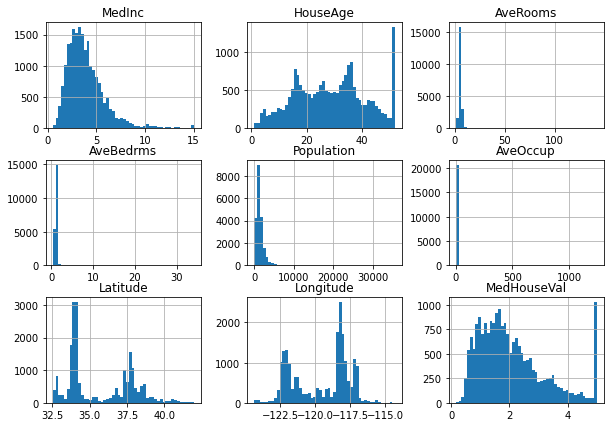

In [8]:
H = df.hist(figsize=(10,7), bins=50)

# Transformación logarítmica

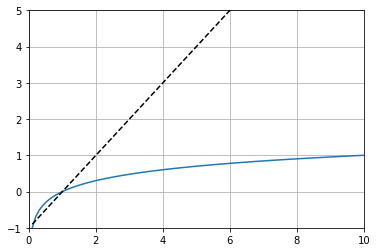

In [9]:
# Gráfica de X vs X'
x = np.linspace(0.1,10,100)
xp = np.log10(x)
plt.plot(x,xp)
plt.plot(x,x-1,'--k')
plt.axis([0,10,-1,5])
plt.grid()

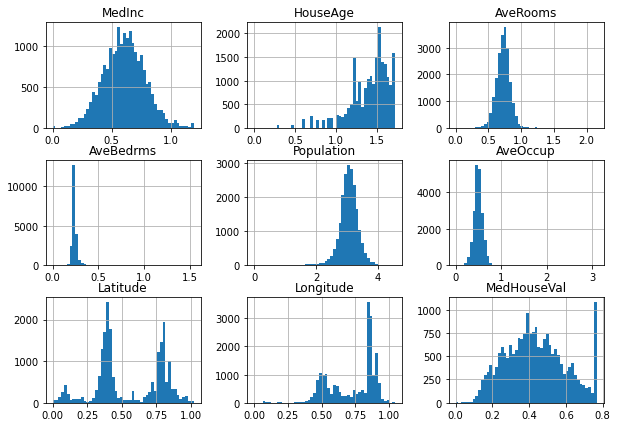

In [10]:
#df_log=df.copy()
df_log = np.log10(df-df.min()+1)
H = df_log.hist(figsize=(10,7), bins=50)

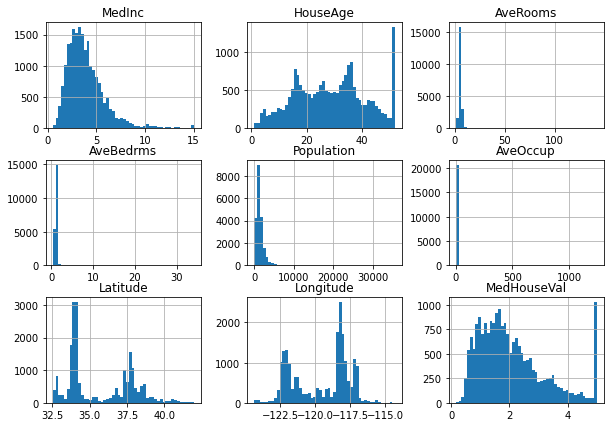

In [11]:
H = df.hist(figsize=(10,7), bins=50)

In [12]:
sesgo = df.skew()
sesgo

MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64

In [13]:
sesgo_log = df_log.skew()
sesgo_log

MedInc         0.078282
HouseAge      -1.289170
AveRooms       0.959245
AveBedrms      8.298256
Population    -1.140433
AveOccup       2.662098
Latitude      -0.080214
Longitude     -0.745362
MedHouseVal    0.237146
dtype: float64

# Transformación recíproca

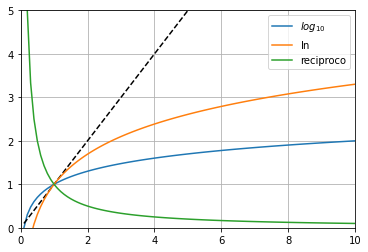

In [15]:
# Gráfica X vs X'
x = np.linspace(0.1,10,100)
xp = np.log10(x)
plt.plot(x,xp+1, label='$log_{10}$')
plt.plot(x,x,'--k')
plt.plot(x,np.log(x)+1, label='$\ln$')
plt.plot(x,1/x, label='reciproco')
plt.axis([0,10,0,5])
plt.legend()
plt.grid()

In [16]:
df_r = 1/(df-df.min()+1)
df_r

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.113311,0.024390,0.140096,0.591549,0.003125,0.349254,0.157729,0.320513,0.186012
1,0.113617,0.047619,0.156446,0.610297,0.000417,0.413645,0.158228,0.319489,0.225479
2,0.128908,0.019231,0.118456,0.574675,0.002024,0.321548,0.158479,0.321543,0.228780
3,0.162782,0.019231,0.167471,0.574803,0.001799,0.350185,0.158479,0.322581,0.234576
4,0.230081,0.019231,0.155383,0.572165,0.001776,0.401742,0.158479,0.322581,0.234082
...,...,...,...,...,...,...,...,...,...
20635,0.485343,0.040000,0.192334,0.555556,0.001186,0.348639,0.125945,0.234742,0.613117
20636,0.327129,0.055556,0.159544,0.504425,0.002825,0.291503,0.125786,0.241546,0.616899
20637,0.454525,0.058824,0.186588,0.559673,0.000995,0.379748,0.126743,0.242131,0.564013
20638,0.422422,0.055556,0.182370,0.543896,0.001353,0.411370,0.126743,0.248139,0.589272


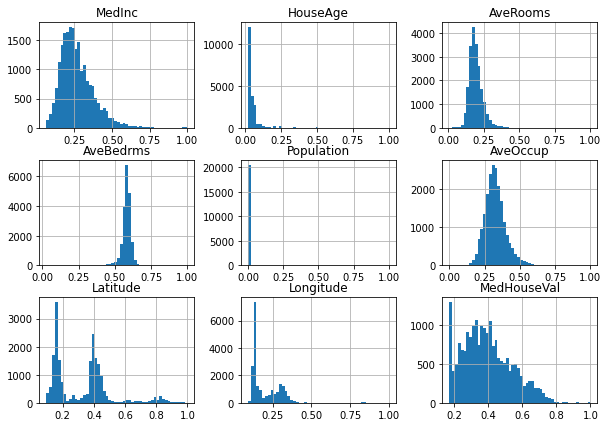

In [17]:
H = df_r.hist(figsize=(10,7),bins=50)

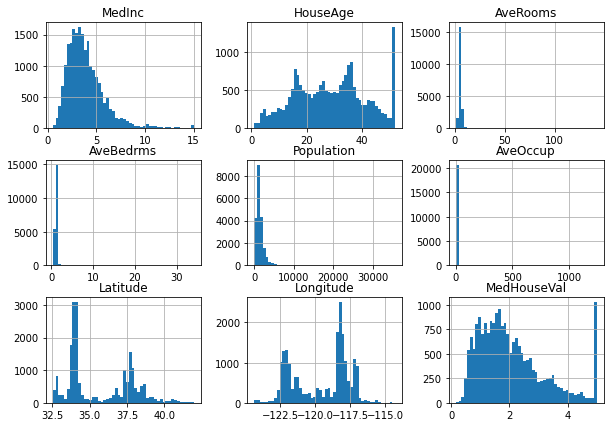

In [18]:
H = df.hist(figsize=(10,7), bins=50)

Condiciones de asimetría:

> Si skewness = 0, los datos se distribuyen normalmente.

> Si skewness > 0, entonces los datos se ponderan más en el lado izquierdo de la distribución.

> Si skewness < 0, entonces los datos se ponderan más en el lado derecho de la distribución.

In [19]:
sesgo_r = df_r.skew()
sesgo_r

MedInc          1.329928
HouseAge        5.719626
AveRooms        1.864921
AveBedrms      -3.911728
Population     80.838678
AveOccup        0.612341
Latitude        1.097306
Longitude       2.185543
MedHouseVal     0.507905
dtype: float64

In [20]:
sesgo_log

MedInc         0.078282
HouseAge      -1.289170
AveRooms       0.959245
AveBedrms      8.298256
Population    -1.140433
AveOccup       2.662098
Latitude      -0.080214
Longitude     -0.745362
MedHouseVal    0.237146
dtype: float64

# Regresión

In [24]:
df.shape

(20640, 9)

In [23]:
idx_transformacion = np.argmin((np.abs(sesgo), np.abs(sesgo_log), np.abs(sesgo_r)), axis=0)
idx_transformacion

array([1, 0, 1, 2, 1, 2, 1, 0, 1], dtype=int64)

In [26]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [25]:
len(idx_transformacion)

9

In [27]:
# Aplicamos logaritmo a las variables 0,2,4,6 y 8.
# Recíproco a las variables 3 y 5.
# Y ninguna transformación a las variables 1 y 7
#
transformacion= (lambda x:x,
                 lambda x: np.log10(x-x.min()+1),
                 lambda x: 1/(x-x.min()+1))
df_t = df.copy()
for i,x in enumerate(df.columns):
    df_t[x] = transformacion[idx_transformacion[i]](df[x])

In [28]:
df_t

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.945729,41.0,0.853575,0.591549,2.505150,0.349254,0.802089,-122.23,0.730460
1,0.944557,21.0,0.805636,0.610297,3.380030,0.413645,0.800717,-122.22,0.646895
2,0.889722,52.0,0.926444,0.574675,2.693727,0.321548,0.800029,-122.24,0.640582
3,0.788395,52.0,0.776061,0.574803,2.745075,0.350185,0.800029,-122.25,0.629716
4,0.638120,52.0,0.808596,0.572165,2.750508,0.401742,0.800029,-122.25,0.630632
...,...,...,...,...,...,...,...,...,...
20635,0.313952,25.0,0.715945,0.555556,2.925828,0.348639,0.899821,-121.09,0.212457
20636,0.485281,18.0,0.797121,0.504425,2.549003,0.291503,0.900367,-121.21,0.209786
20637,0.342442,17.0,0.729115,0.559673,3.002166,0.379748,0.897077,-121.22,0.248711
20638,0.374253,18.0,0.739047,0.543896,2.868644,0.411370,0.897077,-121.32,0.229684


In [29]:
df_t.skew()

MedInc         0.078282
HouseAge       0.060331
AveRooms       0.959245
AveBedrms     -3.911728
Population    -1.140433
AveOccup       0.612341
Latitude      -0.080214
Longitude     -0.297801
MedHouseVal    0.237146
dtype: float64

In [30]:
#Regresión lineal apartir de los datos originales
lin = LinearRegression()
lin.fit(df.drop(columns='MedHouseVal'),df.MedHouseVal)

LinearRegression()

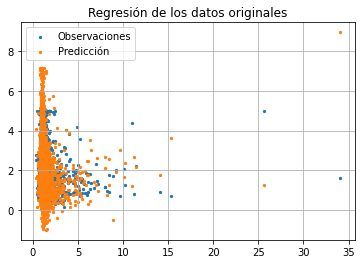

In [31]:
plt.scatter(df['AveBedrms'],df['MedHouseVal'],s=5,label='Observaciones')
prediccion=lin.predict(df.drop(columns='MedHouseVal'))
plt.scatter(df['AveBedrms'],prediccion,label='Predicción',s=5)
plt.legend()
plt.title('Regresión de los datos originales')
plt.grid()

In [32]:
# Transformación para MedHouseVal -> log10
idx_transformacion[-1]

1

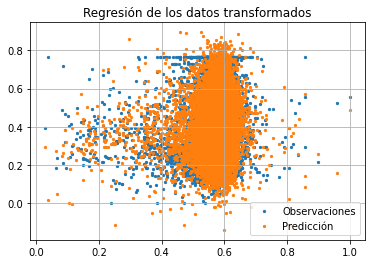

In [33]:
lin_t=LinearRegression()
lin_t.fit(df_t.drop(columns='MedHouseVal'),df_t.MedHouseVal)

plt.scatter(df_t['AveBedrms'],df_t['MedHouseVal'],s=5,label='Observaciones')
prediccion=lin_t.predict(df_t.drop(columns='MedHouseVal'))
plt.scatter(df_t['AveBedrms'],prediccion,label='Predicción',s=5)
plt.legend()
plt.title('Regresión de los datos transformados')
plt.grid()

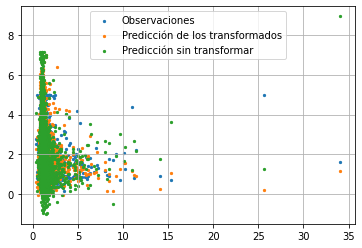

In [34]:
plt.scatter(df['AveBedrms'],df['MedHouseVal'],s=5,label='Observaciones')
prediccion_t=10**(lin_t.predict(df_t.drop(columns='MedHouseVal')))+df.MedHouseVal.min()-1
prediccion=lin.predict(df.drop(columns='MedHouseVal'))
plt.scatter(df['AveBedrms'],prediccion_t,label='Predicción de los transformados',s=5)
plt.scatter(df['AveBedrms'],prediccion,label='Predicción sin transformar',s=5)
plt.legend()
plt.grid()

In [35]:
# Regresión para una variable
#
df=pd.read_csv('Data/regresion.csv')
df.head()

,x,y
0,0.100000,1.932916
1,0.101001,2.242087
2,0.102002,2.022414
3,0.103003,1.692315
4,0.104004,1.672025


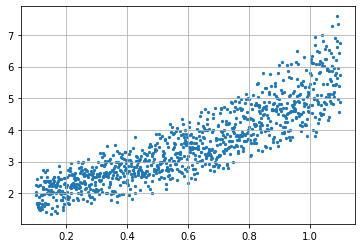

In [36]:
plt.scatter(df.x,df.y,s=5)
plt.grid()

<AxesSubplot:>

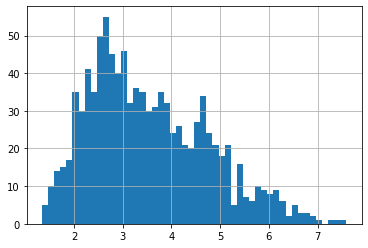

In [37]:
df.y.hist(bins=50)

In [38]:
y=df.y-df.y.min()+1
np.log(y).skew(),np.log10(y).skew(),(1/y).skew(),np.sqrt(y).skew()

(-0.15922700879254476,
 -0.1592270087925433,
 1.0805166141039333,
 0.23470551196648423)

In [39]:
df.y.skew()

0.6089606600475832

<AxesSubplot:>

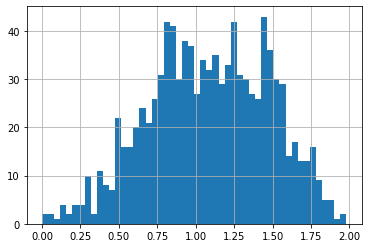

In [40]:
df_t=df.copy()
df_t['y']=np.log(y)
df_t.y.hist(bins=50)

In [41]:
df.x.skew()

0.0

<AxesSubplot:>

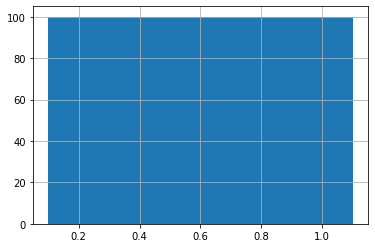

In [42]:
df.x.hist()

In [43]:
lin_t=LinearRegression()

X,x,Y,y=train_test_split(df_t[['x']],df_t['y'])
lin_t.fit(X,Y)
lin_t.score(X,Y),lin_t.score(x,y)

(0.807475156919863, 0.8012148414279799)

In [44]:
lin=LinearRegression()
X1,x1,Y1,y1=train_test_split(df[['x']],df['y'])
lin.fit(X1,Y1)
lin.score(X1,Y1),lin.score(x1,y1)

(0.7868395887623479, 0.7886562014392088)

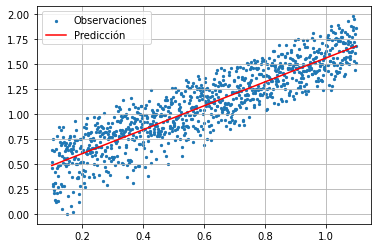

In [45]:
# Gráfica de los datos transformados
plt.scatter(df_t['x'],df_t['y'],s=5,label='Observaciones')
plt.plot(df_t['x'],lin_t.predict(df_t[['x']]),'r',label='Predicción')
plt.legend()
plt.grid()

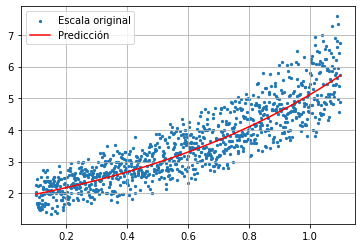

In [46]:
# Gráfica de los datos destransformados
plt.scatter(df['x'],df['y'],label='Escala original',s=5)
f=np.exp(lin_t.predict(df[['x']]))+df.y.min()-1
plt.plot(df['x'],f,'r',label='Predicción')
plt.legend()
plt.grid()